#                                    DATA SCIENCE FOUNDATION PROJECT
                                        

#### Story: In 2013 American Airlines recieved many complaints from its customers. Most of the complaints are regarding Flight Delays. So AA decided to analyze the reason for delays and to invest its resources in resolving the issues. As a Data Scientist, here is our Exploratory Data Analysis.

In [21]:
## This analysis is done using Python language (Numpy, Pandas), Descriptive and Inferential Statistics, 
## Hypotesis Testing, Matplotlib and Seaborn.

In [22]:
# First we need to install/ import necessary Packages
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [23]:
#ds is an alias name to represent my dataset
ds= pd.read_csv('/Users/akhileshvaduka/Documents/GitHub/Foundation-Project/Akhi/flight_data.csv')

In [24]:
ds.head(5) #Gives us Top 5 rows of data
# ds.tail(5) #Gives us bottom 5 rows of data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [25]:
# To check the column datatypes and shape of dataset
print(ds.dtypes)
print (ds.shape)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object
(336776, 19)


In [26]:
ds.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


## CLEAN DATA
Now we need to Clean Data, for that we need to analyse data to find if any missing values.
Based on scenarios we deal with missing data and either remove or fill them.

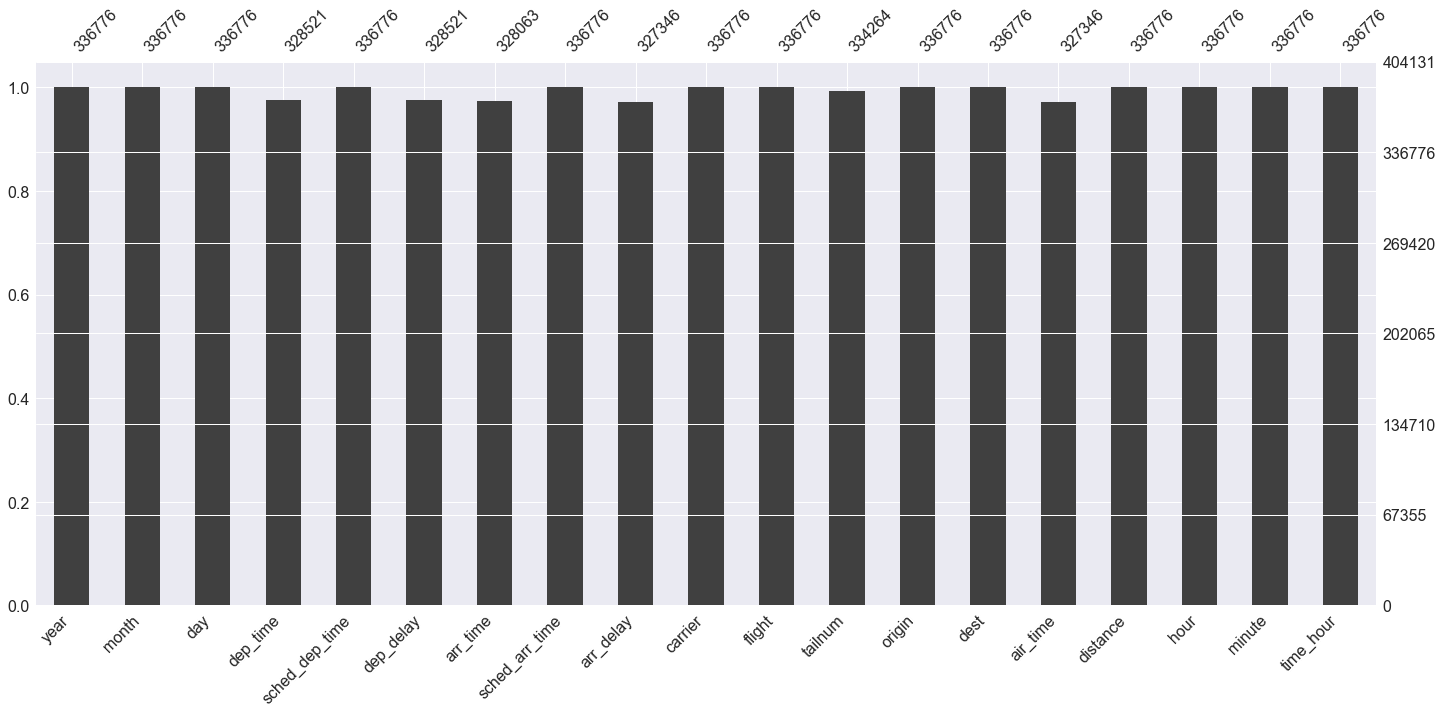

In [27]:
import missingno as msno
# We are importing missingno package
msno.bar(ds)

From above graph we notice that data is missing for some flights.
We have missing data for Departure time, Arrival time, Departure Delay, Arrival Delay and Air time.
Before making any changes to Original Dataset, make a copy and give alias name as ds1. So that we can compare later if needed.

In [28]:
ds1= ds.copy() # To keep original dataset 
#ds1[["dep_time", "arr_time", "dep_delay", "arr_delay", "air_time"]]= ds1[["dep_time", "arr_time", "dep_delay","arr_delay", "air_time"]].fillna(0.0)
ds1[["dep_time", "arr_time", "dep_delay", "arr_delay", "air_time"]]= ds1[["dep_time", "arr_time", "dep_delay","arr_delay", "air_time"]].dropna()
ds1.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


We dropped the fields that have NAN or missing data.
This is because, mostly we are dealing with arrival and departure delays and taking them into consideration gives us different results.
Also if we compare the missing values percentage is very minimal. So dropping them would be appropriate.
Can also delete unwanted or unnecessary columns.

In [29]:
ds1.describe()
print (ds1.shape)

(336776, 19)


Now if we compare copy and original data set - We have same columns and rows.

In [30]:
#Adding new date column from the three columns
ds1['date'] = pd.to_datetime(ds1[['year', 'month', 'day']])

Instead of day, month year, I create a new date column from the three columns.

## ANALYSE DATA AND TRENDS FOR ALL AIRLINES

First we analyse the data for all airlines. Get some trends. Look for corrrealtion and the spread of data.

In [31]:
#Calculating Mean
flights = ds1.groupby([ds1.date]).mean()
flights
print('The maximum average arrival delay:',(max(flights.arr_delay)))
print('The maximum average departure delay:',(max(flights.dep_delay)))

The maximum average arrival delay: 85.8621553885
The maximum average departure delay: 83.6478696742


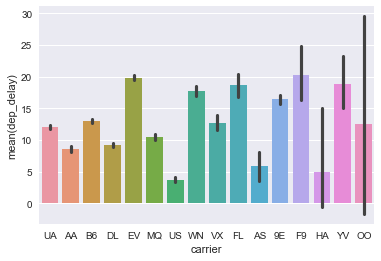

In [32]:
sns.barplot(x='carrier', y='dep_delay', data=ds1, estimator=np.mean)

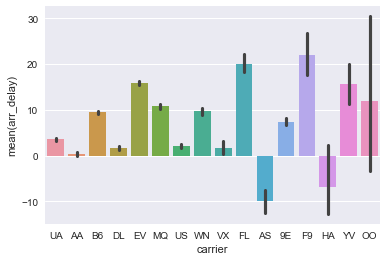

In [33]:
sns.barplot(x='carrier', y='arr_delay', data=ds, estimator=np.mean)

In [34]:
dep_delayed = ds1[ds1['dep_delay'] > 0]
arr_delayed = ds1[ds1['arr_delay'] > 0]

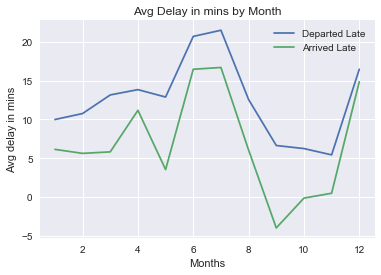

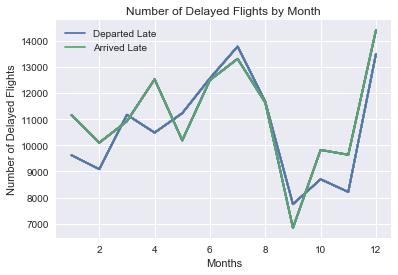

In [35]:

label=['Departed Late', 'Arrived Late']

plt.plot(ds1.groupby('month')['dep_delay'].mean(),label='Departed Late')
plt.plot(ds1.groupby('month')['arr_delay'].mean(),label='Arrived Late')
plt.xlabel('Months')
plt.ylabel('Avg delay in mins')
plt.title('Avg Delay in mins by Month')
plt.legend(label)
plt.show()

plt.plot(dep_delayed.groupby('month').count(),label='Departed Late')
plt.plot(arr_delayed.groupby('month').count(),label='Arrived Late')
plt.xlabel('Months')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Month')
plt.legend(label)
plt.show()

Now we can see the pattern in average delay for all flights/ airlines. As it departs late it arrives late.
We can also see some difference in flights that arrived late are more during holidays.
During Summer and Christmas periods there is increase in delays.

In [36]:
uniq_flights=ds1['carrier'].unique()
print (uniq_flights)

['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA' 'YV'
 'OO']


In [37]:
ds1['delayed'] = ds1['arr_delay'].apply(lambda x: x > 0)
delayed_flights = ds1[ds1['delayed'] == True] 
Total_count = delayed_flights['carrier'].value_counts() 

In [38]:
y=ds1.groupby(['carrier','delayed']).size().unstack()
print (y)

delayed  False  True 
carrier              
9E       11823   6637
AA       22023  10706
AS         525    189
B6       31026  23609
DL       31697  16413
EV       29689  24484
F9         293    392
FL        1365   1895
HA         245     97
MQ       14704  11693
OO          22     10
UA       36443  22222
US       13187   7349
VX        3416   1746
WN        6971   5304
YV         343    258


In [39]:
carrier_details = ds1.groupby('carrier')['dep_delay','arr_delay'].mean()
carrier_details

,dep_delay,arr_delay
carrier,,
9E,16.439574,7.379669
AA,8.569130,0.364291
AS,5.830748,-9.930889
B6,12.967548,9.457973
DL,9.223950,1.644341
EV,19.838929,15.796431
F9,20.201175,21.920705
FL,18.605984,20.115906
HA,4.900585,-6.915205


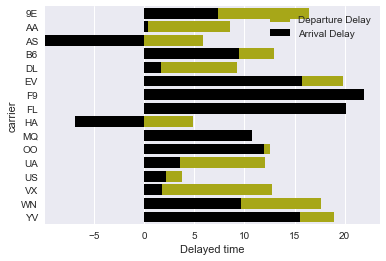

In [40]:
ad = pd.DataFrame({'1' : ds1.groupby(['carrier'])['arr_delay'].mean()}).reset_index()
dd = pd.DataFrame({'2' : ds1.groupby(['carrier'])['dep_delay'].mean()}).reset_index()
ax = sns.barplot(x="2", y="carrier", data=dd,
            label="Departure Delay", color="y")
ax = sns.barplot(x="1", y="carrier", data=ad,
            label="Arrival Delay", color="k")
ax.set(xlabel="Delayed time")
ax.legend()

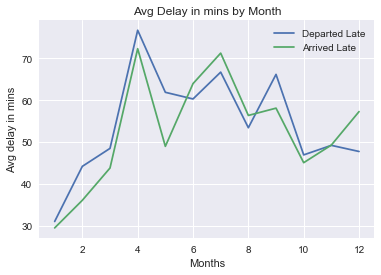

In [41]:
TestAA = ds[(ds['dest']== 'LAX') &( ds['origin']=='JFK')
          & (ds['carrier']=='AA') & (ds['dep_delay']>0)
         & (ds['arr_delay']>0)]
TestAA
label=['Departed Late', 'Arrived Late']
plt.plot(TestAA.groupby('month')['dep_delay'].mean(),label='Departed Late')
plt.plot(TestAA.groupby('month')['arr_delay'].mean(),label='Arrived Late')
plt.xlabel('Months')
plt.ylabel('Avg delay in mins')
plt.title('Avg Delay in mins by Month')
plt.legend(label)
plt.show()
# flights_df_filtered = flights_df[(flights_df.arr_delay>0) & (flights_df.dest=='SEA') & ((flights_df.origin == 'EWR') | (flights_df.origin == 'LGA') | (flights_df.origin == 'JFK'))]     
# print(np.mean(flights_df_filtered.arr_delay)

## Analyse and Compare Airports

In [42]:
print("Number of Origins: {}".format(len(ds1['origin'].unique())))
print("Number of Destinations: {}".format(len(ds1['dest'].unique())))

Number of Origins: 3
Number of Destinations: 105


In [43]:
no_flights_daily = pd.DataFrame(ds1.groupby([ds1.carrier,ds1.flight,ds1.dest,ds1.distance,]).size().reset_index(name='Count'))
no_flights_daily[no_flights_daily.Count == max(no_flights_daily.Count)]

,carrier,flight,dest,distance,Count
775,AA,59,SFO,2586,365
783,AA,119,LAX,2454,365
791,AA,181,LAX,2475,365
913,AA,1357,SJU,1598,365
923,AA,1611,MIA,1096,365
1128,B6,219,CLT,541,365
1157,B6,359,BUR,2465,365
1160,B6,371,FLL,1076,365
1179,B6,431,SRQ,1047,365
1253,B6,703,SJU,1598,365


From 3 airports in and nearby New York, people are travelling to 105 Destinations evey year.

There are 18 Flights that travel daily. American airlines have total of 5 daily flights.

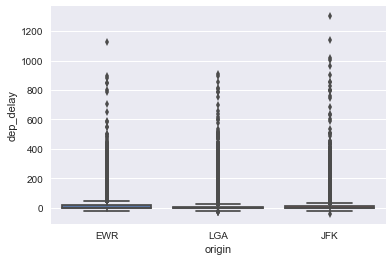

In [44]:
sns.boxplot(x='origin', y='dep_delay', data=ds1)

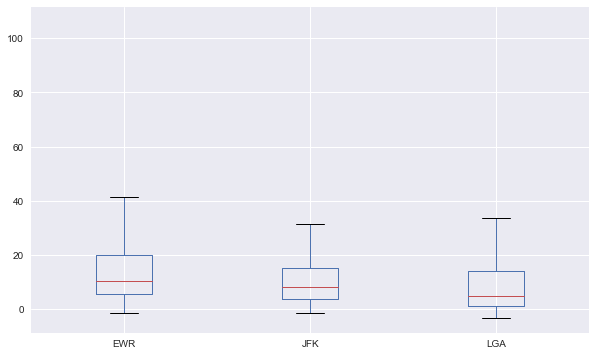

In [45]:
#Comparing Airports
airport_comp = ds1.pivot_table(index='date', columns='origin', values='dep_delay')
airport_comp
airport_comp.plot(kind='box', figsize=[10,6])

Now we can say Airport EWR has highest number of flight delays. There might be some issues with airport maintenace 
to look at.

/Users/akhileshvaduka/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


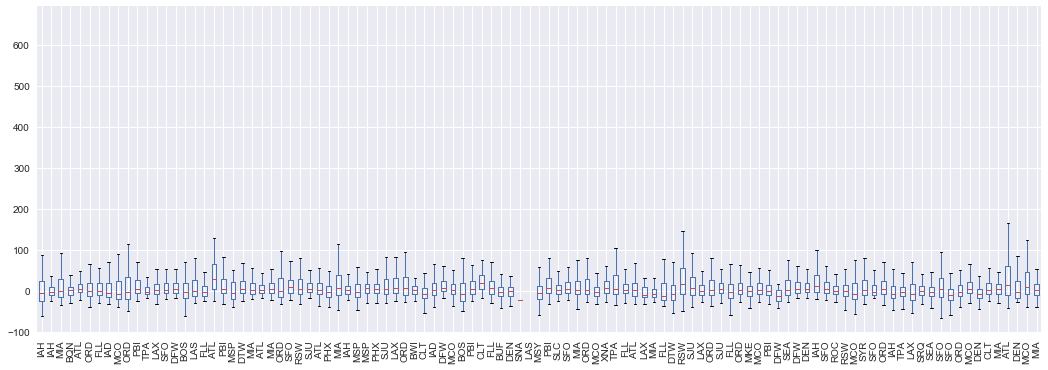

In [46]:
arr_delay_airport = ds1.pivot_table(index='date', columns='dest', values='arr_delay')
g= arr_delay_airport.plot(kind='box', figsize=[18,6])
g.set_xticklabels(ds1.dest,rotation=90)

ValueError: max must be larger than min in range parameter.

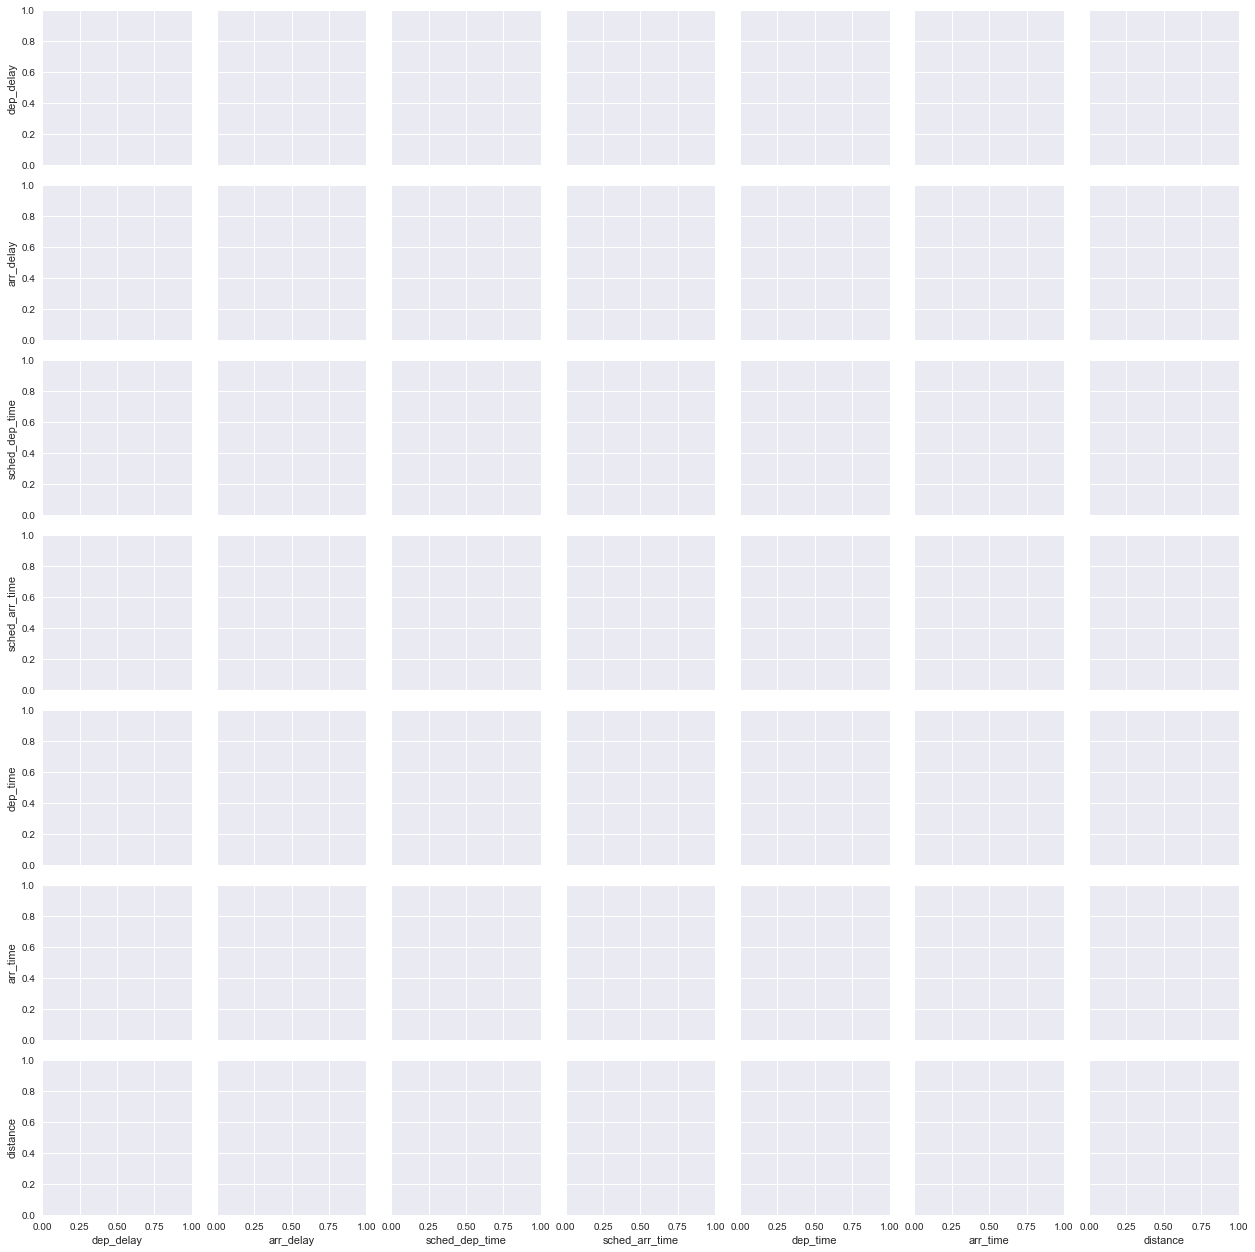

In [47]:
# ds2 = ds1.drop(['date','time_hour'],axis=1)
ds2  =ds1[['dep_delay', 'arr_delay','sched_dep_time', 'sched_arr_time', 'dep_time','arr_time','distance']]
sns.pairplot(data=ds2, palette="deep")

In [ ]:
AA = ds[ds['carrier'] == 'AA']
bin_values = np.arange(-100, 200, 10)
AA['arr_delay'].hist( bins=bin_values, figsize=[10,6])

## FOCUS ON OUTLIERS

In [ ]:
# Need to look at outliers for American Airlines
# These are outliers AA needs to look  as they departured early and arrived late
AA_outlier1 = ds1[(ds1['dep_delay']< 0) &( ds1['arr_delay']> 0)& (ds1['carrier']=='AA')]
print('There number of AA flights that departed early and arrived late:',AA_outlier1['carrier'].count())

AA_outlier2 = ds1[(ds1['sched_dep_time']==ds1['dep_time']) &( ds1['arr_delay']> 0)& (ds1['carrier']=='AA')]
print('There number of AA flights that departed on time and arrived late:',AA_outlier2['carrier'].count())

Here focusing on two outliers for AA
AA_outlier1 are the AA flights that departed early and arrived late.
AA_outlier2 are the AA flights that departed on-time and arrived late.

In [ ]:
# ds2 = AAoutlier.drop(['date','time_hour'],axis=1)
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.swarmplot(x='dest', y='arr_delay', data=AA_outlier1, ax=ax)    
sns.despine()


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.violinplot(x='origin', y='dep_delay', data=AA_outlier1, inner="points", ax=ax)    
sns.despine()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.violinplot(x='dest', y='arr_delay', data=AA_outlier2, ax=ax)    
sns.despine()

From the above two graphs, The occurences of American Airlines flights that departured early than scheduled time  are from more from LGA airport.
Also the occurences that AA arrives late are to Texas and Los Angeles destinations. So there are chances of customers not satisfied with AA airlines that travel to the following destinations.


In [ ]:
# All Flights that are departed late than 15 min and arrived late than 15 min.
# 15 min is grace period for all airlines.
flights_test1 = ds1[(ds1['dep_delay']> 15) &( ds1['arr_delay']> 15)]
flights_test1
sns.barplot(x='carrier', y='arr_delay', data= flights_test1, estimator=np.mean)

In [ ]:
sns.barplot(x='carrier', y='dep_delay', data=flights_test1, estimator=np.mean)

In [ ]:
ds1['speed'] = 60 * ds['distance']/ds['air_time'] 
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.violinplot(x="speed", y="carrier", data=ds1, ax=ax);
ds1['speed'].mean()

Conclusion:
In general 15 minutes arrival late is well withing the satndards and rules. Hence from the above graphs we have seen AA is on par with other airlines. Also if we look at speed, AA is well within its boundaries. The arrival delays are mostly caused at destination airports and its more during Holiday season. 